# Familiarizando-se com o Matlab e o Python

## D01 - Tipos de variáveis do Matlab <br>
### Variáveis reservadas: <br>
   **eps**               _variável útil para convergência (10⁻¹⁶)_ <br>
   **pi**                _razão entre o perímetro da circunferência e seu diâmetro._ <br>
   **inf**               _infinito, por exemplo, 1/0_ <br>
   **NaN**               _Não-numérico, por exemplo, 0/0_ <br> 
   **i e j**             _i=j=sqrt(-1) (raiz quadrada de –1)_ <br>
   **realmin**           _menor número real positivo utilizável_ <br>
   **realmax**           _maior número real positivo utilizável_ <br>
### Variáveis numéricas <br>

_Variáveis numéricas no MATLAB® incluem inteiros, com ou sem sinal, e números em ponto flutuante com precisão simples ou dupla. Por padrão, o MATLAB armazena todos os valores numéricos como ponto flutuante em precisão dupla. (não é possivel modificar o tipo ou a precisão padrão) Pode-se escolher armazenar qualquer número, ou vetor de números, como inteiros ou como precisão simples. Vetores inteiros e de precisão simples oferecem um armazenamento de memória mais eficiente do que vetores de precisão dobrada._

**double**	Double precision <br>
**single**	Single precision <br>
**int8**	8-bit signed integer <br>
**int16**	16-bit signed integer <br>
**int32**	32-bit signed integer <br>
**int64**	64-bit signed integer <br>
**uint8**	8-bit unsigned integer <br>
**uint16**	16-bit unsigned integer <br>
**uint32**	32-bit unsigned integer <br>
**uint64**	64-bit unsigned integer <br>


### Variáveis complexas <br>

_ Números complexos consistem em duas partes separadas: Uma parte real e uma parte imaginária. A unidade básica imaginária é igual à raiz quadrada de -1. No MATLAB® isto é representado por qualquer uma das duas letras: j ou i._ <br>

**Exemplo de variável complexa:** <br>

x = 2 + 3i; <br>

### Caracteres e Strings <br>

_Texto em vetores de caracteres. Podem ser criados, concatenados e comparados_ <br>

### Datas e Tempo <br>

_Vetores com valores de data e de tempo que podem ser exibidos em diferentes formatos. _ <br>

**datetime**	    Array based on current date <br>
**years**	        Duration in years <br>
**days**	        Duration in days <br>
**hours**	        Duration in hours <br>
**minutes**	        Duration in minutes <br>
**seconds**	        Duration in seconds <br>
**milliseconds**	Duration in milliseconds <br>
**duration**	    Duration array<br>

### Categorical Arrays <br>

_Vetores de dados qualitativos com valores que pertencem a um conjunto finito de dados discretos não-numéricos_ <br>

**Exemplo de Categorical Array:** <br>

_Vetor com estados dos Estados Unidos_

state = {'MA','ME','CT','VT','ME','NH','VT','MA','NH','CT','RI'};<br>
state = categorical(state) <br>
class(state) <br>

### Tabelas <br>

_Vetores em formato de tabela nos quais as colunas nomeadas podem ser de diferentes tipos_ <br> 

### Estruturas <br> 

_Vetores com campos nomeados que podem conter dados de diferentes tipos e tamanhos_ <br>

**Exemplo de Estruturas:** <br>

patient(1).name = 'John Doe'; <br>
patient(1).billing = 127.00;  <br>
patient(1).test = [79, 75, 73; 180, 178, 177.5; 220, 210, 205]; <br>
patient <br>

### Cell Arrays <br> 

_Vetores que podem conter dados de tipos e tamanhos variados_

**Exemplo de Cell Array:** <br>

myCell = {1, 2, 3; 'text', rand(5,10,2), {11; 22; 33}} <br>

### Function Handles <br>

_Variáveis que permitem que você invoque uma função indiretamente_ <br>

**Exemplo de Function Handler:** <br>

h = @functionname
trigFun = {@sin, @cos, @tan};


### Map Containers <br>

_Objetos com chaves que indexam valores onde as chaves não precisam ser inteiros_ <br> 

### Time Series <br>

_Vetores de dados amostrados em relação ao tempo_ <br>



## D02 - Ambiente de depuração (debug) <br>

**Variáveis criadas até ao breakpoint do programa:** f s t <br>

f: _variável do tipo_ **double** <br>
s e t: _vetor com 10 variáveis do tipo_ **double** <br>


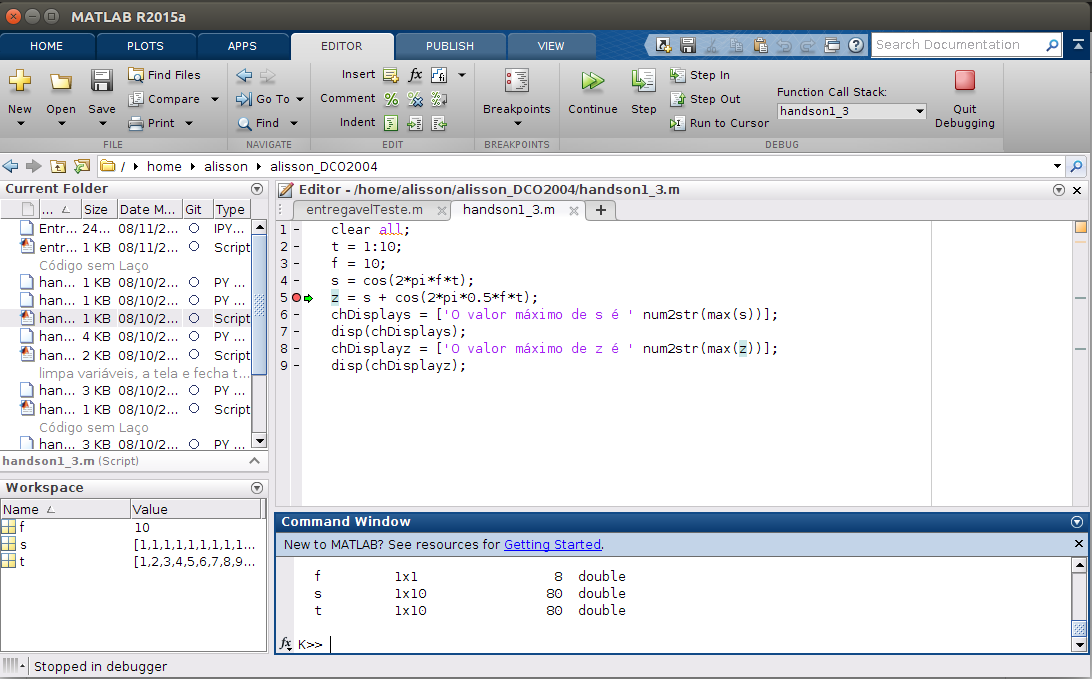

## D03 - Pratica 3 com terceiro roteador (Matlab)

Tempo sem Laço FOR = 0.009823


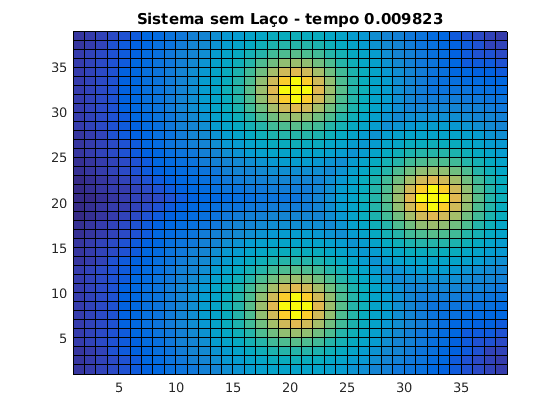

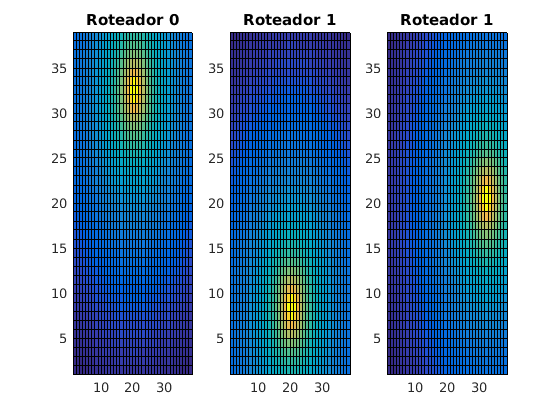

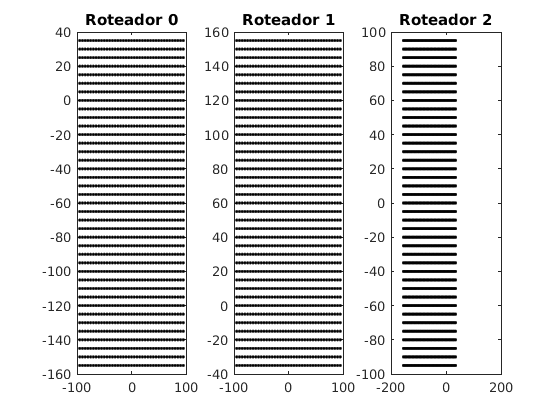

In [3]:
clear all;clc;close all;
dPasso = 5;                          % Resolução do grid
dDim = 200;                          % Dimensão do grid
nl = (dDim-2*dPasso)/dPasso + 1;     % Número de pontos de medição
%% Código sem Laço
t2 = tic;                            % Abre um contador de tempo identificado por t2
% Matriz com posição de cada ponto do grid (posição relativa ao canto inferior direito)
[px,py] = meshgrid(dPasso:dPasso:dDim-dPasso, dPasso:dPasso:dDim-dPasso);
% Matrizes com posição de cada ponto do grid relativa a cada BS
pbs0SF = px + j*py - ( dDim/2 + 0.8*dDim*j);
pbs1SF = px + j*py - ( dDim/2 + 0.2*dDim*j);
pbs2SF = px + j*py - ( 0.8*dDim + 0.5*dDim*j);
% Cálculo da potência recebida em cada roteador
pl0SF = 10*log10(1./(abs(pbs0SF).^4)/1e-3);
pl1SF = 10*log10(1./(abs(pbs1SF).^4)/1e-3);
pl2SF = 10*log10(1./(abs(pbs2SF).^4)/1e-3);
% Cálculo da melhor potência e cada ponto do grid
plfSFaux = max(pl0SF,pl1SF);
plfSF = max(plfSFaux,pl2SF);
tempoSemFor = toc(t2); % fecha contador de tempo e guarda tempo na variável tempoComFor
disp(['Tempo sem Laço FOR = ' num2str(tempoSemFor)]); % Mostra tempo de execuçao do código
%% Gráficos para código com e sem laços for
% Plota as posiçoes dos pontos do grid para os dois roteadores
subplot(1,3,1); plot(pbs0SF,'k.');title('Roteador 0');
subplot(1,3,2); plot(pbs1SF,'k.');title('Roteador 1');
subplot(1,3,3); plot(pbs2SF,'k.');title('Roteador 2');
figure;
% Plota a mapa de cores relativo a potência para os dois roteadores separadamente
subplot(1,3,1); pcolor(pl0SF);title('Roteador 0');
subplot(1,3,2); pcolor(pl1SF);title('Roteador 1');
subplot(1,3,3); pcolor(pl2SF);title('Roteador 1');
figure;
% Plota a mapa de cores relativo a melhor potência em cada ponto do grid (melhor entre os dois roteadores)
pcolor(plfSF);title(['Sistema sem Laço - tempo ' num2str(tempoSemFor)]);

Tempo de execução sem laço FOR: 0.260648


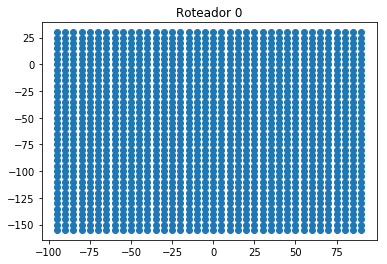

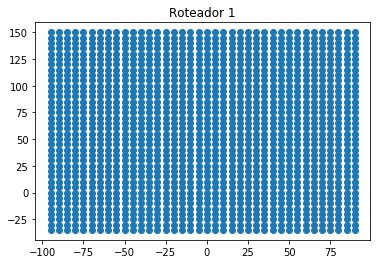

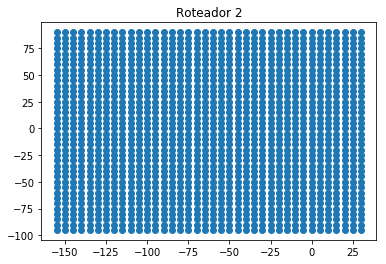

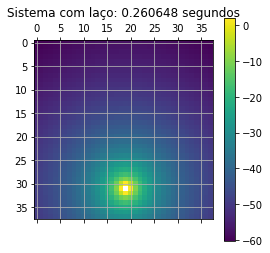

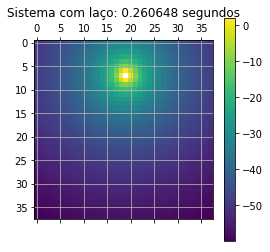

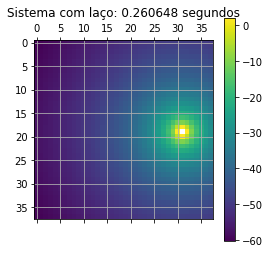

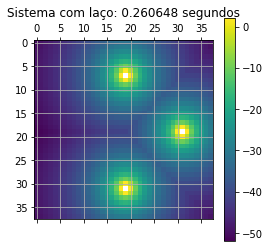

In [1]:
import warnings                        # Método para suprimir os avisos de exceções 
warnings.filterwarnings('ignore')      # Método para suprimir os avisos de exceções 
# Ex.: divisões por zero, que neste exemplo, não é um problema.

import time                            # Importa a biblioteca para as funções relacionadas a contagem de tempo
start_time = time.clock()              # Primeira medição de tempo: inicia a contagem
dPasso = 5                             # Resolução do grid: distância entre um passo e outro
dDim = 200                             # Dimensão do grid
nl = (dDim-2*dPasso)/dPasso + 1        # Número de pontos na medição
import numpy as np                     # Importa biblioteca para cálculos numéricos 

x= np.arange(dPasso,dDim-dPasso,dPasso)
y=np.arange(dPasso,dDim-dPasso,dPasso)
X,Y = np.meshgrid(x,y)

# Matrizes com posição de cada ponto do grid relativa a cada roteador
pbs0 = X + 1j*Y - (dDim/2 + 0.8*dDim*1j)
pbs1 = X + 1j*Y - (dDim/2 + 0.2*dDim*1j)
pbs2 = X + 1j*Y - (0.8*dDim + 0.5*dDim*1j)
# Cálculo da potência recebida em cada ponto do grid recebida de cada roteador
pl0 = 10*np.log10(1/(np.absolute(pbs0)**4)/0.001)
pl1 = 10*np.log10(1/(np.absolute(pbs1)**4)/0.001)
pl2 = 10*np.log10(1/(np.absolute(pbs2)**4)/0.001)
plfaux = np.maximum(pl0,pl1)
plf = np.maximum(plfaux,pl2)

stop_time = time.clock()               # Medição de tempo de execução
# A criação das matrizes e dos laços são a parte de interesse do algoritmo
# por isso a medição se encerra antes de fazermos a plotagem, que é meramente para visualização
tempo_de_execucao = stop_time - start_time
# Mostra tempo de execução na tela
print("Tempo de execução sem laço FOR: "+str(tempo_de_execucao))

from matplotlib import pyplot as plt   # Importa pyplot, que possui as funções essenciais para plotagem
plt.scatter(pbs0.real,pbs0.imag)       # Monta o plot do mapa de pontos do reteador 0
plt.title("Roteador 0")                # Configura o título do plot
plt.show()                             # Mostra o plot do mapa de pontos
plt.scatter(pbs1.real,pbs1.imag)       # Monta o plot do mapa de pontos do reteador 1
plt.title("Roteador 1")                # Configura o título do plot
plt.show()
plt.scatter(pbs2.real,pbs2.imag)       # Monta o plot do mapa de pontos do reteador 1
plt.title("Roteador 2")                # Configura o título do plot
plt.show()
plt.matshow(pl0)                       # Monta mapa de cores (colormap) para potência recebida do roteador 0
plt.grid()                             # Adiciona as linhas horizontais e verticais
plt.colorbar()                         # Adiciona a barra vertical com escala numérica das cores
# Título do mapa de cores (colormap) para potência recebida do roteador 0, incluindo tempo de execução
plt.title("Sistema com laço: "+ str(tempo_de_execucao)+ " segundos",y=1.1)
plt.matshow(pl1)                       # Monta mapa de cores (colormap) para potência recebida do roteador 0
plt.grid()                             # Adiciona as linhas horizontais e verticais
plt.colorbar()                         # Adiciona a barra vertical com escala numérica das cores
# Título do mapa de cores (colormap) para potência recebida do roteador 0, incluindo tempo de execução
plt.title("Sistema com laço: "+ str(tempo_de_execucao)+ " segundos",y=1.1)
plt.matshow(pl2)                       # Monta mapa de cores (colormap) para potência recebida do roteador 0
plt.grid()                             # Adiciona as linhas horizontais e verticais
plt.colorbar()                         # Adiciona a barra vertical com escala numérica das cores
# Título do mapa de cores (colormap) para potência recebida do roteador 0, incluindo tempo de execução
plt.title("Sistema com laço: "+ str(tempo_de_execucao)+ " segundos",y=1.1)

# Monta mapa de cores de melhor potência recebida em cada ponto do grid (melhor entre os dois roteadores)
plt.matshow(plf)                 
plt.grid()                             # Adiciona as linhas horizontais e verticais
plt.colorbar()                         # Adiciona a barra vertical com escala numérica das cores
# Título do mapa de melhor potência recebida em cada ponto do grid (melhor entre os dois roteadores)
plt.title("Sistema com laço: "+ str(tempo_de_execucao)+ " segundos",y=1.1)
plt.show() 